# Rayleigh_Ritz method in Python

## Author :  Muhammad Hassanzadeh
#### project of variational calculus by D.r Morteza Garshasbi


The Rayleigh Ritz method is a classical approximate method to find the displacement function of an object such that the it is in extremised state. It is regarded as an ancestor of the widely used Finite Element Method (FEM), control volume problems and etc,this method works when our classical variational maethod like Euler_Lagrange equation doesn't get us to solution.by Weierstrass theorem we can approximate any continious function by sequence of linear independent basis functions
for solving boundary value problem we deal with second order ordinary differential equations given $y(x_0)=y_0 , y(x_1)=y_1$ : $$a(x)\ddot y+b(x)\dot y +c(x)y=f(x)$$ Then  we  can change the boundary value problem to a variational problem using analytical methods to construct the following functional beacaus we are approximating and thus we have errors regardless of rounding error of computar we try to find best fitting coefficient of basis functions by extremising following functional:


  $$ I[y]=\int_{x_0}^{x_1} [p(x)(\frac{dy}{dx})^2 +q(x)y^2 + r(x)y]dx$$ 
  
  

the steps to find twice_differntiable approximation in this method are as following:


i)make a trial function $$U(x)=\phi_0 (x)+\sum_{j=1}^{n} c_j \phi_j (x)$$
in which  $\phi_0 (x)$  satisfies our boundary conditions $y(x_0)=y_0 , y(x_1)=y_1$ and all $\phi_j (x)$  get value of zero in boundary conditions.



ii) now for finding scaler coefficient $c_j $ we can subsitute our trial function in functional ,then integerating it and we get algabraic equations for each $c_j $  by letting $$\frac{\partial I(c_j)}{c_j}=0$$

### check the solved example at the end of script

###### created on january 2022 univesity of IUST 



## importing libraries and taking inputs from user
the program works by having boundary conditions and functions of p,q,r which for $3sin(x)+x^2$ need to be typed like: 3* sin(x) + x* * x
###### by entering poly in asked input program will use polynomial for approximation, otherwise it uses sine functions .

In [1]:
%matplotlib inline
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

x=Symbol('x')
p=Eq(Function('p')(x),eval(input('please enter p(x) ='))).rhs
q=Eq(Function('q')(x),eval(input('please enter q(x) ='))).rhs
r=Eq(Function('r')(x),eval(input('please enter r(x) ='))).rhs
f=Function('f')(x)
x0=float(input('please enter x0='))
y0=float(input('please enter y0='))
x1=float(input('please enter x1='))
y1=float(input('please enter y1='))
nn=int(input('please enter number of terms in RRM='))
choose=input('please enter poly if you want polynomial or as basis functions=')
compare=input('please y if you want to see comparing of basis function in graph=')
print(nn)

please enter p(x) =3*x**2
please enter q(x) =sin(2*x)*2
please enter r(x) =x*cos(3*x)*2
please enter x0=1
please enter y0=0
please enter x1=2
please enter y1=3
please enter number of terms in RRM=2
please enter poly if you want polynomial or as basis functions=poly
please y if you want to see comparing of basis function in graph=y
2


In [2]:
#instead of extrimising our functional by Euler_Lagrang method we are going to use Rayleigh Rits method 
#using set of trial basis functions that satisfies the functional make it algabraic 
I=Integral(Eq(p*f.diff(x)**2+q*f**2+r*f,0).lhs,[x,x0,x1])
print(I)
I

Integral(3*x**2*Derivative(f(x), x)**2 + 2*x*f(x)*cos(3*x) + 2*f(x)**2*sin(2*x), (x, 1.0, 2.0))


Integral(3*x**2*Derivative(f(x), x)**2 + 2*x*f(x)*cos(3*x) + 2*f(x)**2*sin(2*x), (x, 1.0, 2.0))

# make a trial function$$u(x)=\phi_0 (x)+\sum_{j=1}^{n} c_j \phi_j (x)$$
in which  $\phi_0 (x)$  satisfies our boundary conditions $y(x_0)=y_0 , y(x_1)=y_1$ and all $\phi_j (x)$  get value of zero in boundary conditions.


In [3]:
#phi0 must satisfies non_homogeneous boundry conditioin i.e BCs
a,b,=symbols(' a b ')

def phi0(x):
    return a*x+b

eq1=Eq(phi0(x0),y0)
eq2=Eq(phi0(x1),y1)

sol=solve((eq1,eq2),(a,b))
a1=sol[a]
b1=sol[b]
print(a1*x+b1)
phi0=a1*x+b1

sol

3.0*x - 3.0


{a: 3.00000000000000, b: -3.00000000000000}

#  constructing n term of basis functions  $$\sum_{j=1}^{n} c_j \phi_j (x)$$

In [4]:
#phij of x are element of c**2[x0, x1] it means they are solution to our homogeneous problem form dI/dc=0
dic={}
u=0
n=1

if choose=='poly':
    for i in range(1,(nn+1)):
        dic[f'c{i}']=Symbol(f'c{i}')
        u+=dic[f'c{i}']*x**(i-1)
        phij=u*(x-x0)*(x-x1)
        print(dic[f'c{i}'])
        #now we plug in our estimated trial function in functional 
        I_new=Integral(p*(phi0+phij).diff(x)**2+q*(phi0+phij)**2+r*(phi0+phij),[x,x0,x1])
else:
        
    for i in range(1,(nn+1)):
        dic[f'c{i}']=Symbol(f'c{i}')
        u+=dic[f'c{i}']*sin((i+1)*np.pi*(x-x0)/(x1-x0))
        phij=u
        #now we plug in our estimated trial function in functional 
        I_new=Integral(p*(phi0+phij).diff(x)**2+q*(phi0+phij)**2+r*(phi0+phij),[x,x0,x1])
    
#and itegerating it respect to x0 x1 so we get a function based on cj
I_fun_c=integrate(I_new,[x,x0,x1])

un=Eq(Function('U_n')(x),phi0+phij)
un

c1
c2


Eq(U_n(x), 3.0*x + (c1 + c2*x)*(x - 2.0)*(x - 1.0) - 3.0)

# solveing algabraic equations for each $c_j $  $$\frac{\partial I(c_j)}{\partial c_j}=0$$

In [5]:
#getting partial derivative of I(cj)/dcj=0 and finding cj
param=[]
equ=[]
for i in range(1,(nn+1)):
    equ.append(I_fun_c.diff(f'c{i}'))
    param.append(dic[f'c{i}'])

#solvig j equation and j unknown using sympy.solve
dIcj_sol=solve(equ,param)
#print(dIcj_sol)

#subsituting founded cj in our trial function u

un=un.subs(dIcj_sol)
print(un.rhs)

un.subs('x',x1)


3.0*x + (x - 2.0)*(x - 1.0)*(1.23882466276833*x - 3.89891921190956) - 3.0


Eq(U_n(2.0), 3.0)

# plotting the approximated solution

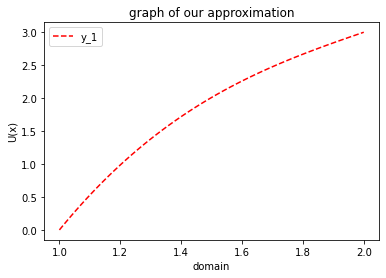

In [6]:

xx=np.linspace(x0,x1,100)
yy=[]
for i in xx:
    yy.append(un.rhs.subs('x',i))
#exact=6/xx+3*xx-9
plt.xlabel("domain")
plt.ylabel("U(x)")
#plt.plot( xx,exact, 'yo',label='exact' )
plt.plot( xx, yy, 'r--' ,label='y_1')
#plt.plot( xx,yyy,'b--' ,label='y_2')
plt.title('graph of our approximation')
plt.legend()
plt.show()



# One example
in solving by BC $y(1)=0 , y(2)=0$
  $$ I[y]=\int_{1}^{2} [\frac{1}{2}x^2(\frac{dy}{dx})^2  +6xy]dx$$ 
  we know exact solution that's shown in yellow dotted curve:$$y_e=\frac{6}{x}+3x-9$$
  and by help of this program via RR method we get following approximation 
  first with $n=1$ that's shown in red :
  $$y_1-=1.875(x-2)(x-1)$$
  
  and second one is with $n=2$ that's shown in blue dash curve:(as u can see its almost like exact)
  $$y_2=(3.97206703910632 - 1.2905027932962x)(x - 2)(x - 1)$$

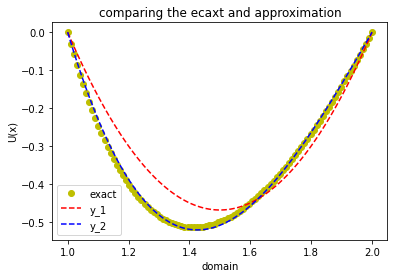

In [7]:
#this is an example:
xx=np.linspace(1,2,100)
yy=1.875*(xx - 2)*(xx - 1)
yyy=(3.97206703910632 - 1.2905027932962*xx)*(xx - 2)*(xx - 1)
exact=6/xx+3*xx-9
plt.xlabel("domain")
plt.ylabel("U(x)")
plt.plot( xx,exact, 'yo',label='exact' )
plt.plot( xx, yy, 'r--' ,label='y_1')
plt.plot( xx,yyy,'b--' ,label='y_2')
plt.title('comparing the ecaxt and approximation')
plt.legend()
plt.show()


# Here you can see comparing of basis functions
this section is to say for each spesefic problem set of specefic basis function is reguired. 

3.0*x + (x - 2.0)*(x - 1.0)*(1.23882466276833*x - 3.89891921190956) - 3.0
Eq(U_n(x), 3.0*x + (x - 2.0)*(x - 1.0)*(1.23882466276833*x - 3.89891921190956) - 3.0)
Eq(U_n2(x), 3.0*x - 0.0152427212735261*sin(6.28318530717959*x - 6.28318530717959) + 0.0168116318817264*sin(9.42477796076938*x - 9.42477796076938) - 3.0)


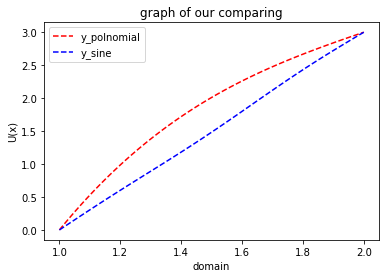

In [8]:
dic={}
dic2={}
u=0
u2=0
n=1

if compare=='y':
    for i in range(1,(nn+1)):
        dic[f'c{i}']=Symbol(f'c{i}')
        u+=dic[f'c{i}']*x**(i-1)
        phij=u*(x-x0)*(x-x1)
        #now we plug in our estimated trial function in functional 
        I_new=Integral(p*(phi0+phij).diff(x)**2+q*(phi0+phij)**2+r*(phi0+phij),[x,x0,x1])
 
        dic2[f'c{i}']=Symbol(f'c{i}')
        u2+=dic[f'c{i}']*sin((i+1)*np.pi*(x-x0)/(x1-x0))
        phij2=u2
        #now we plug in our estimated trial function in functional 
        I_new2=Integral(p*(phi0+phij2).diff(x)**2+q*(phi0+phij2)**2+r*(phi0+phij2),[x,x0,x1])
    
#and itegerating it respect to x0 x1 so we get a function based on cj
I_fun_c=integrate(I_new,[x,x0,x1])
I_fun_c2=integrate(I_new2,[x,x0,x1])
un=Eq(Function('U_n')(x),phi0+phij)
un2=Eq(Function('U_n2')(x),phi0+phij2)


#getting partial derivative of I(cj)/dcj=0 and finding cj
param=[]
equ=[]
param2=[]
equ2=[]
for i in range(1,(nn+1)):
    equ.append(I_fun_c.diff(f'c{i}'))
    param.append(dic[f'c{i}'])

#solvig j equation and j unknown using sympy.solve
dIcj_sol=solve(equ,param)
#print(dIcj_sol)

#subsituting founded cj in our trial function u

un=un.subs(dIcj_sol)
print(un.rhs)

for i in range(1,(nn+1)):
    equ2.append(I_fun_c2.diff(f'c{i}'))
    param2.append(dic2[f'c{i}'])

#solvig j equation and j unknown using sympy.solve
dIcj_sol2=solve(equ2,param2)
#print(dIcj_sol)

#subsituting founded cj in our trial function u

un=un.subs(dIcj_sol)
un2=un2.subs(dIcj_sol2)
print(un)
print(un2)

xx=np.linspace(x0,x1,100)
yy=[]
yy2=[]
for i in xx:
    yy.append(un.rhs.subs('x',i))
for i in xx:
    yy2.append(un2.rhs.subs('x',i))

plt.xlabel("domain")
plt.ylabel("U(x)")

plt.plot( xx, yy, 'r--' ,label='y_polnomial')
plt.plot( xx,yy2,'b--' ,label='y_sine')
plt.title('graph of our comparing')
plt.legend()
plt.show()


finished
## D.r Garshasbi Thank you for your teaching
#### best regards Muhammd